# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
import pickle
import csv
import generate_final_data

# Importing the dataset

In [2]:
dataset = pd.read_csv('../../data/engine_final.csv')
dataset.head().append(dataset.tail())

,engine,month,air_temp,noise,epr,egt,ff,n1,n2,fp_noise,fp_epr,fp_egt,fp_ff,fp_n1,fp_n2,failure_prob
0,1,1,0,130,50,1300,5000,12000,10000,0,0,NaN,NaN,NaN,NaN,NaN
1,1,2,-14,130,50,1518,5212,12550,10559,0,0,NaN,NaN,NaN,NaN,NaN
2,1,3,-7,131,50,1522,5222,12597,10601,0,0,NaN,NaN,NaN,NaN,NaN
3,1,4,-5,131,50,1541,5233,12610,10636,0,0,NaN,NaN,NaN,NaN,NaN
4,1,5,0,132,50,1546,5238,12656,10658,0,0,NaN,NaN,NaN,NaN,NaN
55,1,56,-6,152,51,2107,5697,14440,12443,100,100,NaN,NaN,NaN,NaN,NaN
56,1,57,-5,152,49,2124,5708,14482,12491,100,100,NaN,NaN,NaN,NaN,NaN
57,1,58,-6,153,49,2130,5715,14519,12521,100,100,NaN,NaN,NaN,NaN,NaN
58,1,59,-15,153,49,2147,5730,14555,12560,100,100,NaN,NaN,NaN,NaN,NaN
59,1,60,0,154,52,2152,5735,14583,12582,100,100,NaN,NaN,NaN,NaN,NaN


# Predicting Fan Blade's Life Span

In [3]:
X_noise_data = dataset.iloc[:, 3:4]
X_noise = X_noise_data.values

# Loading and fitting the regression model
with open('slr_noise.pkl', 'rb') as f:
    regressor = pickle.load(f)

# Predicting the results
y_pred_noise = regressor.predict(X_noise)
y_pred_noise[y_pred_noise > 100] = 100
y_pred_noise[y_pred_noise < 0] = 0

dataset['fp_noise'] = list(y_pred_noise.astype(int).ravel())

# Predicting Turbine's Life Span

In [4]:
X_egt_data = dataset.loc[:, ['egt']]
X_egt = X_egt_data.values

# Loading and fitting the regression model
with open('slr_egt.pkl', 'rb') as f:
    regressor = pickle.load(f)

# Predicting the results
y_pred_egt = regressor.predict(X_egt)
y_pred_egt[y_pred_egt > 100] = 100
y_pred_egt[y_pred_egt < 0] = 0

dataset['fp_egt'] = list(y_pred_egt.astype(int).ravel())

# Predicting Fuel Filter's Life Span

In [5]:
X_ff_data = dataset.loc[:, ['ff']]
X_ff = X_ff_data.values

# Loading and fitting the regression model
with open('slr_ff.pkl', 'rb') as f:
    regressor = pickle.load(f)

# Predicting the results
y_pred_ff = regressor.predict(X_ff)
y_pred_ff[y_pred_ff > 100] = 100
y_pred_ff[y_pred_ff < 0] = 0

dataset['fp_ff'] = list(y_pred_ff.astype(int).ravel())

# Predicting Low Pressure Fan's (N1) Life Span

In [6]:
X_n1_data = dataset.loc[:, ['n1']]
X_n1 = X_n1_data.values

# Loading and fitting the regression model
with open('slr_n1.pkl', 'rb') as f:
    regressor = pickle.load(f)

# Predicting the results
y_pred_n1 = regressor.predict(X_n1)
y_pred_n1[y_pred_n1 > 100] = 100
y_pred_n1[y_pred_n1 < 0] = 0

dataset['fp_n1'] = list(y_pred_n1.astype(int).ravel())

# Predicting High Pressure Rotor's (N2) Life Span

In [7]:
X_n2_data = dataset.loc[:, ['n2']]
X_n2 = X_n2_data.values

# Loading and fitting the regression model
with open('slr_n2.pkl', 'rb') as f:
    regressor = pickle.load(f)

# Predicting the results
y_pred_n2 = regressor.predict(X_n2)
y_pred_n2[y_pred_n2 > 100] = 100
y_pred_n2[y_pred_n2 < 0] = 0

dataset['fp_n2'] = list(y_pred_n2.astype(int).ravel())

# Predicting Overall Engine's Probability of Failure

In [8]:
X_data = dataset.iloc[:, 1:15]
X = X_data.values

# Encoding categorical data
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

# Avoiding dummy variable trap
categories = [0]
dummies = []
dummies_sum = 0

for category in categories:
    dummies_sum += (dataset.iloc[:, category].unique().size) * category
    dummies.append(dummies_sum)

X = np.delete(X, dummies, 1)

# Loading and fitting the regression model
with open('mlr_all.pkl', 'rb') as f:
    regressor = pickle.load(f)
    
# Predicting the results
y_pred = regressor.predict(X)
y_pred[y_pred > 100] = 100
y_pred[y_pred < 0] = 0

dataset['failure_prob'] = list(y_pred.astype(int).ravel())

# Writing the predictions to CSV file

In [9]:
dataset.to_csv('../../data/engine_final.csv', index=False)

# Importing Dataset with values under normal conditions

In [10]:
normal_dataset = pd.read_csv('../../data/engine_data_normal_final.csv')
X_normal = normal_dataset
y_normal = normal_dataset.loc[:, 'failure_prob'].values
y_normal = y_normal / 100
y_normal[y_normal > 1] = 1

In [11]:
# Converting probability from 0-100 to 0-1

y_pred = y_pred / 100

# Plotting Graph

IndexError: index 0 is out of bounds for axis 0 with size 0

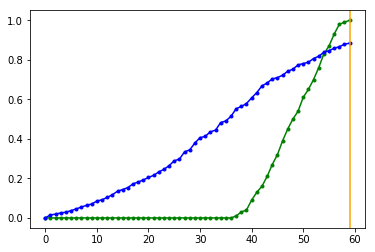

In [12]:
plt.plot(X_data['month'][0:60], y_normal[0:60], color = 'green', linestyle='-', marker='.', label='Actual Life Span')
plt.plot(X_data['month'][0:60], y_pred.ravel()[0:60], color = 'blue', linestyle='-', marker='.', label='Predicted Life Span')
plt.axvline(x=np.where(y_normal==1)[0][0], color='orange', label='Actual month of failure')
plt.axvline(x=np.where(y_pred>0.99)[0][0], color='red', label='Predicted month of failure')        
plt.xticks(np.arange(0, 61, 3))
plt.yticks(np.arange(0, 1.05, 0.1))
plt.title('Age (in months) vs Probability of Failure')
plt.legend(loc='best')
plt.xlabel('Age (in months)')
plt.ylabel('Probability of Failure')
plt.show()

# Writing output to a new csv file

In [ ]:
output_df = pd.DataFrame()
output_df['Components'] = ['Fan Blades', 'Turbine', 'Fuel Filter', 'Low Pressure Fan (N1)', 'High Pressure Rotor (N2)', 'Turbine Failure']
output_df['Actual life span under normal conditions(in months)'] = [str(np.where(X_normal['fp_noise'].values==100)[0][0] + 1), str(np.where(X_normal['fp_egt'].values==100)[0][0] + 1), str(np.where(X_normal['fp_ff'].values==100)[0][0] + 1), str(np.where(X_normal['fp_n1'].values==100)[0][0] + 1), str(np.where(X_normal['fp_n2'].values==100)[0][0] + 1), str(np.where(X_normal['failure_prob'].values==100)[0][0] + 1)]            
output_df['Predicted life span after sudden increase(in months)'] = [str(np.where(y_pred_noise==100)[0][0]), str(np.where(y_pred_egt==100)[0][0]), str(np.where(y_pred_ff==100)[0][0]), str(np.where(y_pred_n1==100)[0][0]), str(np.where(y_pred_n2==100)[0][0]), str(np.where(X_normal['failure_prob'].values==100)[0][0])]  
output_df